# Deep Learning with TensorFlow

![Namespace Logo](../labs.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('transfusion.data')

In [3]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [5]:
X = df.drop(['whether he/she donated blood in March 2007'],axis=1)

In [6]:
y = df['whether he/she donated blood in March 2007']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler()

In [11]:
X_train = sc.fit_transform(X_train)

In [12]:
X_test = sc.transform(X_test)

In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout

In [14]:
model = keras.Sequential([
    
        Dense(20,activation='relu',input_dim=4),
        Dense(15,activation='relu'),
        Dropout(0.2),
        Dense(25,activation='relu'),
        Dense(1,activation=keras.activations.sigmoid)
])


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train,epochs=1600,validation_data = (X_test,y_test))

Epoch 1/1600
17/17 [==============================] - 0s 13ms/step - loss: 0.6993 - accuracy: 0.4837 - val_loss: 0.6784 - val_accuracy: 0.7422
Epoch 2/1600
17/17 [==============================] - 0s 4ms/step - loss: 0.6639 - accuracy: 0.7476 - val_loss: 0.6436 - val_accuracy: 0.7467
Epoch 3/1600
17/17 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.7686 - val_loss: 0.6133 - val_accuracy: 0.7467
Epoch 4/1600
17/17 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.7686 - val_loss: 0.5843 - val_accuracy: 0.7467
Epoch 5/1600
17/17 [==============================] - 0s 4ms/step - loss: 0.5729 - accuracy: 0.7686 - val_loss: 0.5659 - val_accuracy: 0.7467
Epoch 6/1600
17/17 [==============================] - 0s 4ms/step - loss: 0.5583 - accuracy: 0.7686 - val_loss: 0.5549 - val_accuracy: 0.7467
Epoch 7/1600
17/17 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.7686 - val_loss: 0.5495 - val_accuracy: 0.7467
Epoch

In [17]:
losses = pd.DataFrame(history.history)

In [18]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.699272,0.483748,0.678429,0.742222
1,0.663897,0.747610,0.643638,0.746667
2,0.631807,0.768642,0.613260,0.746667
3,0.600378,0.768642,0.584342,0.746667
4,0.572861,0.768642,0.565927,0.746667


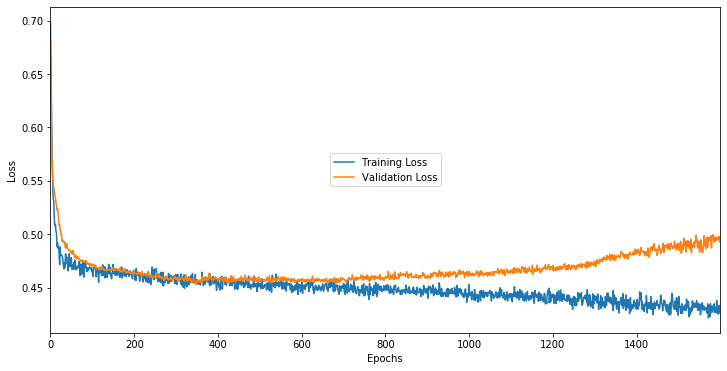

In [19]:
plt.figure(figsize=(12,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
losses['loss'].plot(label='Training Loss')
losses['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

In [21]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7733


[0.497222900390625, 0.7733333110809326]

In [22]:
predictions = model.predict(X_test)
import numpy as np
np.set_printoptions(suppress=True)

In [23]:
predictions_df = pd.DataFrame(predictions.round(3),columns=['Prediction'])

In [24]:
predictions_df.head()

,Prediction
0,0.095
1,0.485
2,0.086
3,0.072
4,0.087


In [25]:
 predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 1 columns):
Prediction    225 non-null float32
dtypes: float32(1)
memory usage: 1.0 KB


In [26]:
predictions_df['Row ID'] = range(0,225)

In [27]:
predictions_df.tail()

,Prediction,Row ID
220,0.095,220
221,0.091,221
222,0.092,222
223,0.342,223
224,0.103,224


In [28]:
predictions_df['Prediction'].max()

0.996999979019165

In [29]:
predictions_df['Prediction'].min()

0.01899999938905239

In [30]:
predictions = (predictions > 0.5)


In [31]:
#predictions

In [32]:
from sklearn.metrics import classification_report

In [33]:

print(classification_report(predictions.reshape(225,), y_test))

              precision    recall  f1-score   support

       False       0.95      0.79      0.86       201
        True       0.26      0.62      0.37        24

    accuracy                           0.77       225
   macro avg       0.60      0.71      0.62       225
weighted avg       0.87      0.77      0.81       225



Happy Learning!